In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [132]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

In [61]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [63]:
df.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

So, we should predict, who is ready to be hunted :) <br/>


Avaliable train data description:
* enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* * experience: Candidate total experience in years
* * company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

In [64]:
Y = df.target

In [65]:
Y.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [66]:
df = df.drop('target', axis=1)

Look at the data - The most part of participants aren't ready to change his job :C <br/>

*Lets do a quick view of our features:*


In [67]:
for column in df.columns:
    print('Feature:', column)
    print(df[column].value_counts())

Feature: enrollee_id
6147     1
13612    1
7465     1
29988    1
23841    1
        ..
4759     1
6806     1
12947    1
14994    1
2047     1
Name: enrollee_id, Length: 19158, dtype: int64
Feature: city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_121       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
Feature: city_development_index
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.824       4
0.807       4
0.625       3
0.781       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
Feature: gender
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
Feature: relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
Feature: enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     119

**Which features are binary?**

Unfortunately the data doesn't provide us any prepeared binary features :( <br/>
Let's get them ourselves!
<p><b>Which features can be converted to binary?</b></p>

* Gender: "<b>isMale</b>"? Let's guess that men are less stable in his job and want to change it! This our first binary feature. *We will have some problems with "Others"..diversity chase us in HR world... They are not men - 0 for it.*
* relevent_experience: You can "Has relevent experience" or "No relevent experience". Without the third variant,  thats ok. "<b>HasRelevantExperience</b>" feature - our friend.
* enrolled_university: Keep it simple! For the first step we can take "<b>isEnrolled</b>" feature. What time? Full or Part? Just make it simple. 

**Which features are numerical?**
* training_hours
* city_development_index

*Thats all..Lets get some more*

**Which features can be converted to numerical?**

* education_level - we have to grade our categories of education
* experience - lets set 0 for "<1" and 21 for "20+".
* last_new_job - we will call it "tenure", but look at this later


**Which features are categorical?**

* city - I guess "city index" is enough. Except that we can find "Favorite" city to relocate from.
* major_discipline
* company_size
* company_type

**Convert our features**
1. Binary features

In [68]:
# Gender
df['is_male'] = df.gender == 'Male'
df['is_female'] = df.gender == 'Female'
#HasReleventExperience
df['has_relevent_experience'] = df.relevent_experience == 'Has relevent experience'

2. Numerical features

In [69]:
# educational level
df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

*so, we should create a grade system for education level just using timeline in education* <br>
and we will fill empty values with 3 - the most popular value

In [70]:
def get_educational_grade(stage_name):
    educational_grade_map = {'Primary School':1,
                         'High School': 2,
                         'Graduate': 3,
                         'Masters': 4,
                         'Phd': 5}
    
    if stage_name is None or str(stage_name) == 'nan':
        return 3
    else:
        return educational_grade_map[stage_name]
    
df['education_level'] = df['education_level'].apply(get_educational_grade)

In [71]:
def get_experience_grade(exp):
    if exp == '<1' or str(exp) == 'nan':
        return 0
    if exp == '>20':
        return 21
    else:
        return int(exp)
    
df['experience'] = df['experience'].apply(get_experience_grade)

As for "last_new_job" we can call it "tenure" in current company <br>
if we get "never" we can take an experience of candidate, because all his experience was it current company

In [72]:
def get_tenure_column(last_new_job, experience):
    result = []
    for i in range(len(last_new_job)):
        tenure = last_new_job[i]
        if tenure == '>4':
            result.append(5)
            continue
        if tenure == 'never':
            result.append(experience[i])
            continue
        if str(tenure) == 'nan':
            result.append(0)
        else:
            result.append(int(tenure))
    return result

df['tenure'] = get_tenure_column(df.last_new_job, df.experience)

> Lets stop here and try to use current features - without categorical features

In [73]:
binary_columns = ['is_male', 'is_female', 'has_relevent_experience']
numeric_columns = ['education_level', 'experience', 'tenure', 'training_hours', 'city_development_index']

In [74]:
df = df[binary_columns + numeric_columns]

In [77]:
df['target'] = Y

In [78]:
df.head()

,is_male,is_female,has_relevent_experience,education_level,experience,tenure,training_hours,city_development_index,target
0,True,False,True,3,21,1,36,0.920,1.0
1,True,False,False,3,15,5,47,0.776,0.0
2,False,False,False,3,5,5,83,0.624,0.0
3,False,False,False,3,0,0,52,0.789,1.0
4,True,False,True,4,21,4,8,0.767,0.0


First of all we should check selected variables ?<br>
Are they realy important?

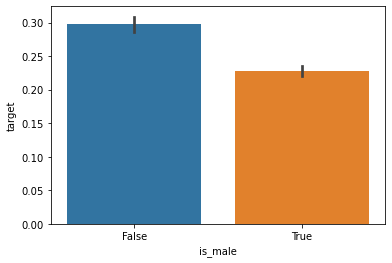

In [80]:
ax = sns.barplot(x='is_male', y='target', data=df)

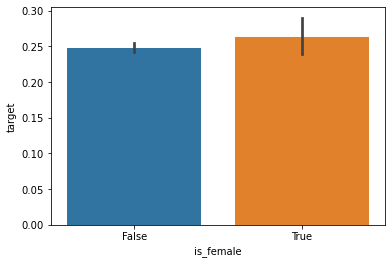

In [82]:
ax = sns.barplot(x='is_female', y='target', data=df)

"is_male" feature looks important, lets keep it

In [85]:
df = df.drop('is_female', axis=1)

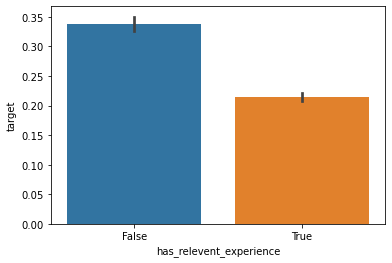

In [86]:
ax = sns.barplot(x='has_relevent_experience', y='target', data=df)

Experienced candidates wants to stay with current company more than others

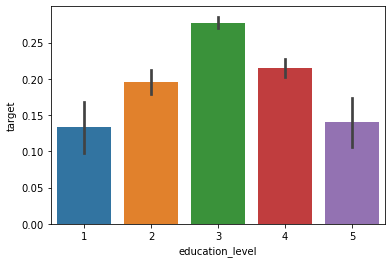

In [87]:
ax = sns.barplot(x='education_level', y='target', data=df)

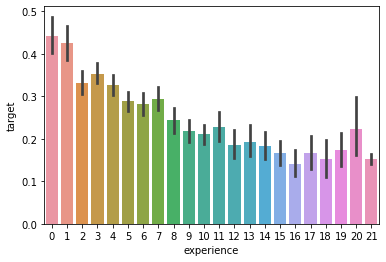

In [88]:
ax = sns.barplot(x='experience', y='target', data=df)

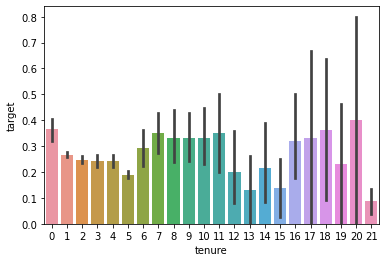

In [89]:
ax = sns.barplot(x='tenure', y='target', data=df)

tenure looks random after 10th year of experience, we can stay with experience

In [91]:
df = df.drop('tenure', axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


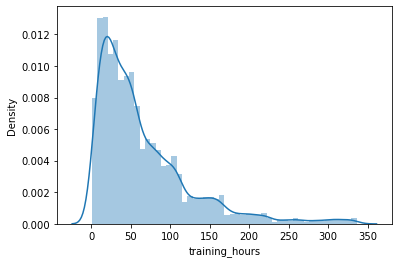

In [103]:
plt_1 = sns.distplot(df.training_hours)

it can be converted to normal dist:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


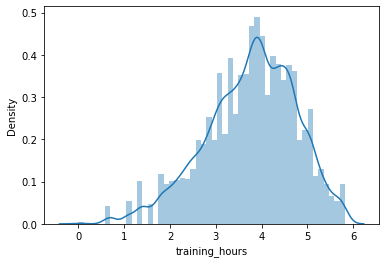

In [105]:
ax1 = sns.distplot(np.log(df.training_hours))

In [107]:
df['training_hours_feature'] = np.log(df['training_hours'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


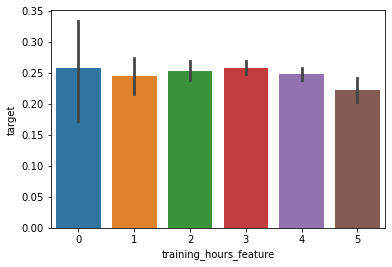

In [109]:
ax = sns.barplot(df['training_hours_feature'].astype(int), y=df['target'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


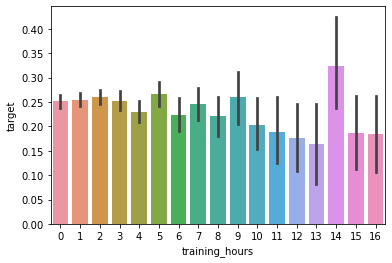

In [112]:
ax = sns.barplot(df['training_hours'].apply(lambda x: x//20), y=df['target'])

In [115]:
df = df.drop('training_hours', axis=1)

looks like not important feature :( <br>
but i want to try to save it in our experement

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


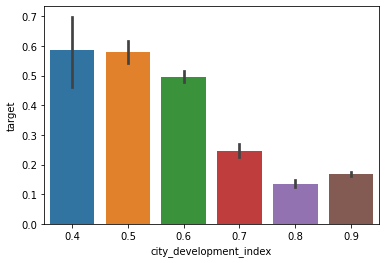

In [114]:
ax = sns.barplot(df['city_development_index'].apply(lambda x: x*100//10 / 10), y=df['target'])

thats significant, as we saw!

In [172]:
X = df.drop('target', axis=1)
# X = X.drop('training_hours_feature', axis=1)
X

,is_male,has_relevent_experience,education_level,experience,city_development_index
0,True,True,3,21,0.920
1,True,False,3,15,0.776
2,False,False,3,5,0.624
3,False,False,3,0,0.789
4,True,True,4,21,0.767
...,...,...,...,...,...
19153,True,False,3,14,0.878
19154,True,True,3,14,0.920
19155,True,True,3,21,0.920
19156,True,True,2,0,0.802


# **Finally: ML Part here!)**

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [180]:
log_clf = LogisticRegression()

In [181]:
log_clf.fit(X_train, y_train)

LogisticRegression()

In [182]:
y_pred = log_clf.predict(X_test)
y_pred_proba = log_clf.predict_proba(X_test)

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      4714
         1.0       0.55      0.21      0.30      1609

    accuracy                           0.76      6323
   macro avg       0.66      0.58      0.58      6323
weighted avg       0.72      0.76      0.71      6323



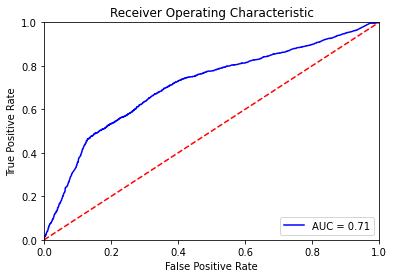

In [191]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = log_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Not the best result, but thats only start of our way ;)